### 1. Data preprocessing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error as mape, root_mean_squared_error as rmse, mean_absolute_error as mae,  mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [23]:
# Split: [0] = 80% 20% | [1] = 70% 30% | [2] = 90% 10%
split_type = [0.8,0.7,0.9]
# Stock [0] = FPT | [1] = CMG | [2] = ITD
stock_name = ["FPT", "CMG", "ITD"]

In [24]:
#Change stock and split to adjust between splitting type and stock
stock = 0
split = 2

In [25]:
#Loading data 
df = pd.read_csv(f"../../dataset/{stock_name[stock]}_stock.csv")
df = df[['close']]
df = df.reset_index(drop=True)
df.head()

,close
0,19270
1,19440
2,19390
3,19270
4,19330


In [26]:
#Shape of the dataframe
df.shape

(1313, 1)

In [27]:
#Describe the dataframe
df.describe()

,close
count,1313.000000
mean,56880.086824
std,27473.981127
min,19190.000000
25%,28410.000000
50%,63470.000000
75%,71450.000000
max,138000.000000


In [28]:
#Defining the split size
train_size = int(split_type[split] * len(df))
test_size = len(df) - train_size

In [29]:
#splitting data into train, test set
train_data = df[:train_size]
test_data = df[train_size:]

In [30]:
#splitting sets into independent and dependent variable
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])


### 2. Model training

In [31]:
# Create a Linear Regression model and fitting it
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
#Predicting using test set
y_test_pred = model.predict(X_test)

### Forecast 30 days

In [33]:
#Change num of days to change days to forecast
num_of_days = 30
predicted_day = np.array(range(df.index[-1]+1, df.index[-1]+num_of_days+1)).reshape(-1,1)

In [34]:
#Forecasting the stock price for next "num_of_days" days
y_30_days_pred = model.predict(predicted_day)

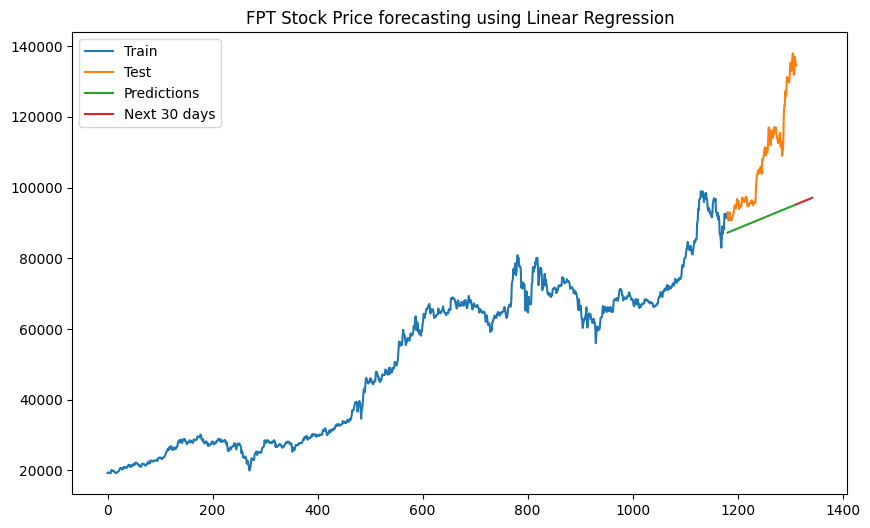

In [35]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(predicted_day, y_30_days_pred)
plt.title(f"{stock_name[stock]} Stock Price forecasting using Linear Regression")
plt.legend(['Train', 'Test','Predictions', f"Next {num_of_days} days"])
plt.show()

### Forecast 60 days

In [36]:
#Change num of days to change days to forecast
num_of_days = 60
predicted_day = np.array(range(df.index[-1]+1, df.index[-1]+num_of_days+1)).reshape(-1,1)

In [37]:
#Forecasting the stock price for next "num_of_days" days
y_60_days_pred = model.predict(predicted_day)

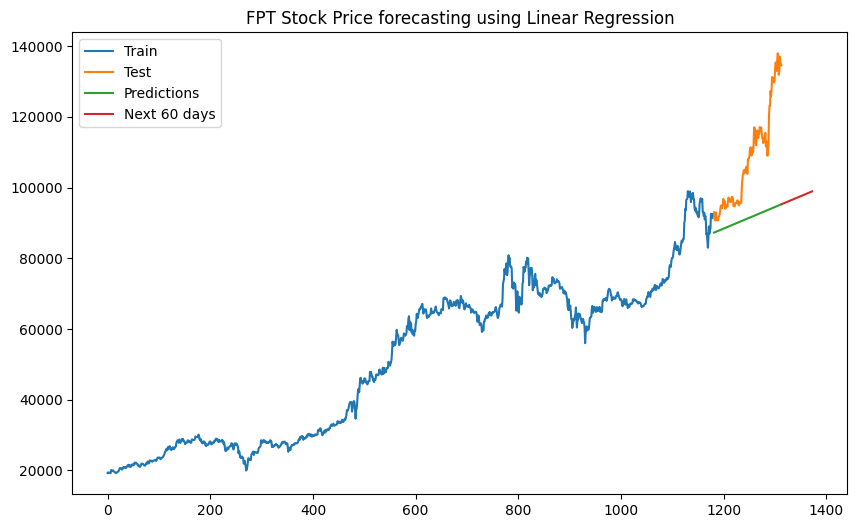

In [38]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(predicted_day, y_60_days_pred)
plt.title(f"{stock_name[stock]} Stock Price forecasting using Linear Regression")
plt.legend(['Train', 'Test','Predictions', f"Next {num_of_days} days"])
plt.show()

### Forecast 90 days

In [39]:
#Change num of days to change days to forecast
num_of_days = 90
predicted_day = np.array(range(df.index[-1]+1, df.index[-1]+num_of_days+1)).reshape(-1,1)

In [40]:
#Forecasting the stock price for next "num_of_days" days
y_90_days_pred = model.predict(predicted_day)

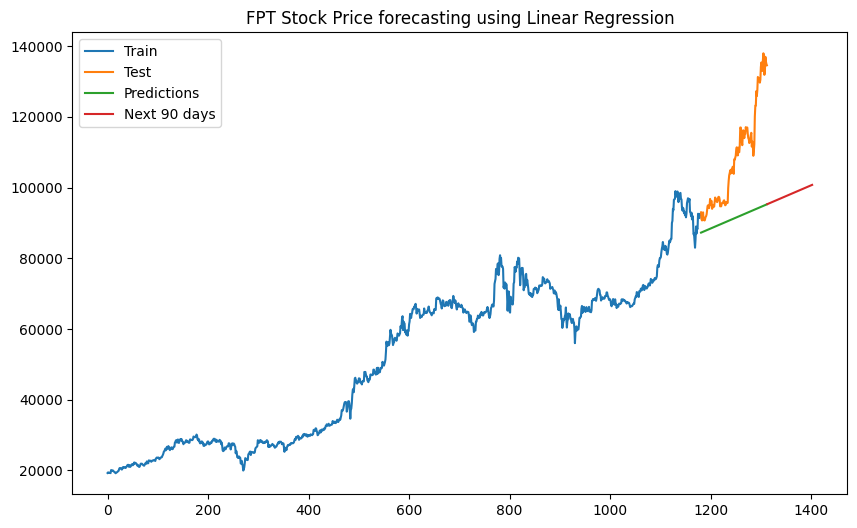

In [41]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(predicted_day, y_90_days_pred)
plt.title(f"{stock_name[stock]} Stock Price forecasting using Linear Regression")
plt.legend(['Train', 'Test','Predictions', f"Next {num_of_days} days"])
plt.show()

### 3. Model evaluation

In [42]:
# Model evaluation on test set
print(f"MSE on test data: {mse(y_test, y_test_pred)}")
print(f"MAPE on test data: {mape(y_test, y_test_pred) * 100}%")
print(f"RMSE on test data: {rmse(y_test, y_test_pred)}")
print(f"MAE on test data: {mae(y_test, y_test_pred)}")

MSE on test data: 423889249.56213576
MAPE on test data: 14.56407676190821%
RMSE on test data: 20588.570847976207
MAE on test data: 16918.13453119516
